In [217]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import matplotlib.patches as patches
import pandas as pd
from astropy.visualization import simple_norm
from astropy import wcs
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from matplotlib.transforms import Bbox

In [218]:
image_file ='/orange/adamginsburg/w51/w51-alma-longbaseline/FITS/W51e2_cont_superuniformSC_tclean.image.fits'

In [219]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /orange/adamginsburg/w51/w51-alma-longbaseline/FITS/W51e2_cont_superuniformSC_tclean.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      79   (7056, 7056, 1, 1)   float32   


In [220]:
image_data = hdu_list[0].data

In [221]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(1, 1, 7056, 7056)


In [222]:
image_data = np.squeeze(image_data)

In [223]:
print(image_data.shape)

(7056, 7056)


In [224]:
header_e2 = hdu_list['PRIMARY'].header

In [225]:
header_e2

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                 7056                                                  
NAXIS2  =                 7056                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   6.056207542618E-06                                                  
BMIN    =   3.947261720896E-06                                                  
BPA     =  -4.425876235962E+

In [226]:
hdu_list.close()

In [227]:
wcs_e2 = wcs.WCS(header_e2)

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

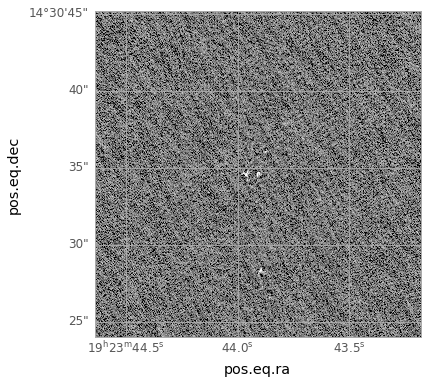

In [228]:
# ??????

fig = plt.figure()
ax = plt.subplot(projection=wcs_e2.celestial)
ax.imshow(image_data, origin='lower', cmap='gray', interpolation="nearest", norm=norm)
plt.show()

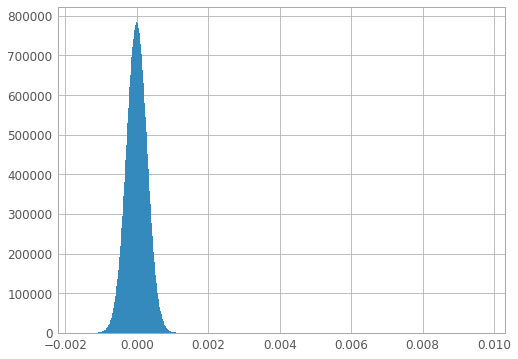

In [229]:
NBINS = 1000
histogram = plt.hist(image_data.flat, NBINS)

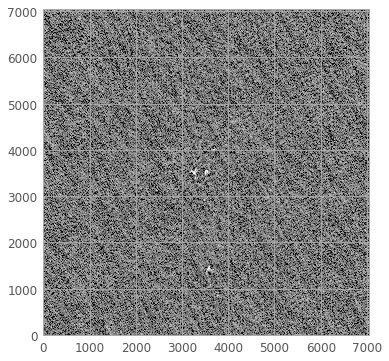

In [230]:
# This definitly is not what I want, but LogNorm did something...
norm=simple_norm(image_data, stretch='asinh', min_percent=5, max_percent=99.99)
plt.imshow(image_data, cmap='gray', interpolation="nearest", norm=norm,
          origin="lower")
plt.show()

In [231]:
cropped = image_data[2500:4000, 2800:4400]
norm0=simple_norm(cropped, stretch='asinh', min_percent=5, max_percent=99.99)

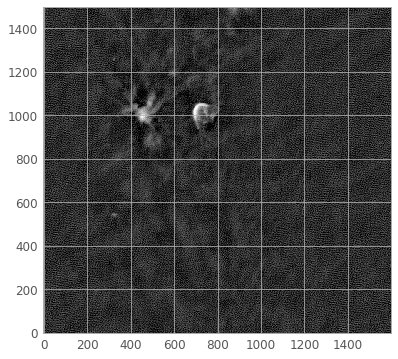

In [232]:
plt.imshow(cropped, cmap='gray', interpolation="nearest",
          origin="lower", norm=norm0)
plt.show()

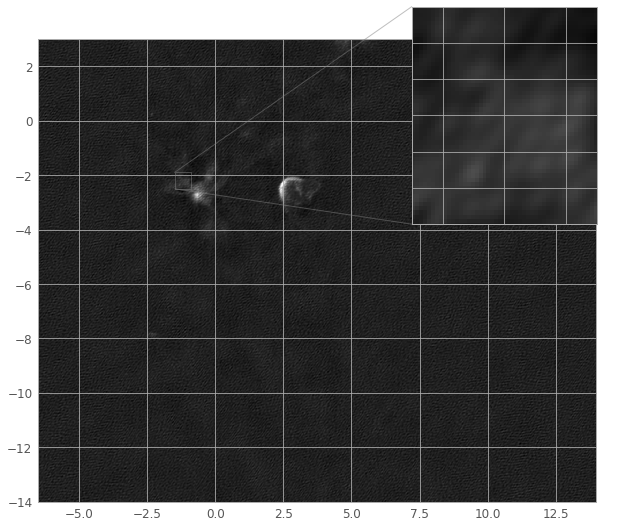

In [233]:
fig, ax = plt.subplots(figsize=[10, 10])

# make data
Z2 = cropped
extent = (-6.5, 14, -14, 3)

ax.imshow(Z2, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower")

# inset axes....
axins = ax.inset_axes([0.6, 0.6, 0.47, 0.47])
axins.imshow(Z2, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower")
# sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins)

plt.show()

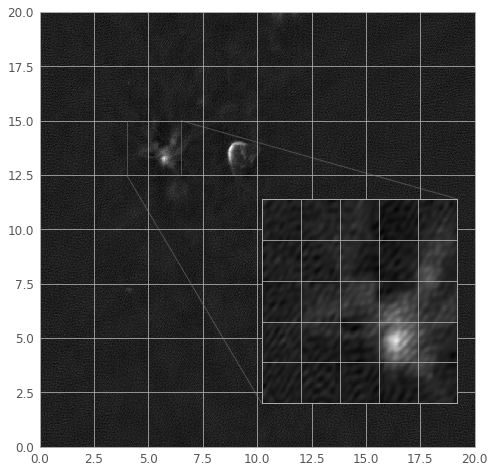

In [234]:
fig, ax = plt.subplots(figsize=[8, 8])

# make data
Z2 = cropped
extent = (0, 20, 0, 20)

ax.imshow(Z2, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower")

# inset axes....
axins = ax.inset_axes([0.5, 0.1, 0.47, 0.47])
axins.imshow(Z2, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower")
# sub region of the original image
x1, x2, y1, y2 = 4, 6.5, 12.5, 15
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins)

plt.show()

In [235]:
image_file2 ='/orange/adamginsburg/w51/ALMA-IMF_W51/W51-IRS2/B3/cleanest/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_preselfcal.image.tt0.pbcor.fits'

In [236]:
hdu_list2 = fits.open(image_file2)
hdu_list2.info()

Filename: /orange/adamginsburg/w51/ALMA-IMF_W51/W51-IRS2/B3/cleanest/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_preselfcal.image.tt0.pbcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      76   (3840, 3840, 1, 1)   float32   


In [237]:
image_data2 = hdu_list2[0].data

In [238]:
print(type(image_data2))
print(image_data2.shape)

<class 'numpy.ndarray'>
(1, 1, 3840, 3840)


In [239]:
image_data2 = np.squeeze(image_data2)

In [240]:
print(image_data2.shape)

(3840, 3840)


In [241]:
header_IRS2 = hdu_list2['PRIMARY'].header

In [242]:
hdu_list2.close()

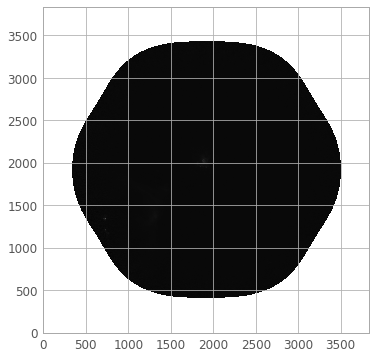

In [243]:
plt.imshow(image_data2, cmap='gray', interpolation="nearest",
          origin="lower")
plt.show()

In [244]:
zoomin = image_data2[1800:2300, 1600:2300]

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


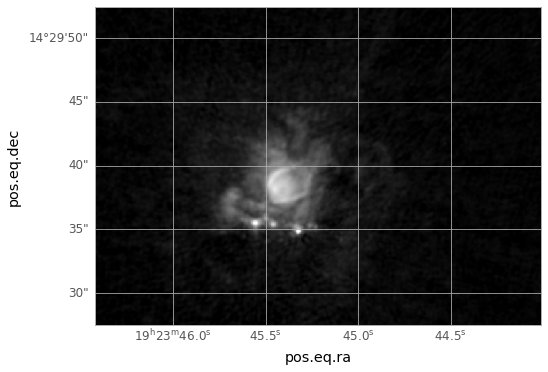

In [245]:
wcs_IRS2= wcs.WCS(header_IRS2)
norm2=simple_norm(zoomin, stretch='asinh', min_percent=5, max_percent=99.995)
fig = plt.figure()
ax = plt.subplot(projection=wcs_IRS2.celestial)
ax.imshow(zoomin, cmap='gray', interpolation="nearest", origin="lower", norm=norm2)
plt.show()

In [246]:
image_file3 ='/orange/adamginsburg/w51/w51-alma-longbaseline/FITS/W51n_cont_uniform.image.tt0.pbcor.fits'

In [247]:
hdu_list3 = fits.open(image_file3)
hdu_list3.info()

Filename: /orange/adamginsburg/w51/w51-alma-longbaseline/FITS/W51n_cont_uniform.image.tt0.pbcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (5120, 5120)   float32   


In [248]:
image_data3 = hdu_list3[0].data

In [249]:
print(type(image_data3))
print(image_data3.shape)

<class 'numpy.ndarray'>
(5120, 5120)


In [250]:
image_data3 = np.squeeze(image_data3)

In [251]:
print(image_data3.shape)

(5120, 5120)


In [252]:
header3 = hdu_list3['PRIMARY'].header

In [253]:
hdu_list3.close()

In [254]:
wcs3 = wcs.WCS(header)

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

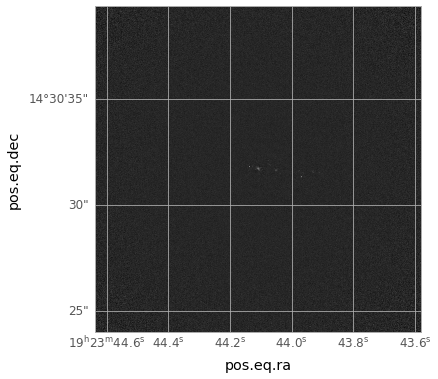

In [255]:
fig = plt.figure()
ax = plt.subplot(projection=wcs3.celestial)
ax.imshow(image_data3, cmap='gray', interpolation="nearest",
          origin="lower")
plt.show()

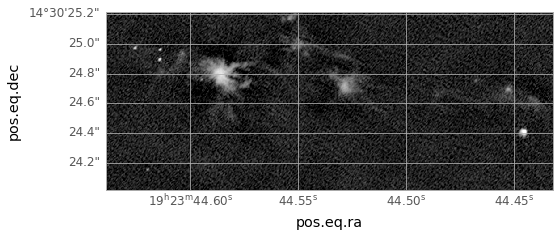

In [314]:
zoomin2 = image_data3[2300:2700, 2300:3300]
norm3=simple_norm(zoomin2, stretch='asinh', min_percent=5, max_percent=99.99)
fig = plt.figure()
ax = plt.subplot(projection=wcs3.celestial)
ax.imshow(zoomin2, cmap='gray', interpolation="nearest", origin="lower", norm=norm3)
plt.show()

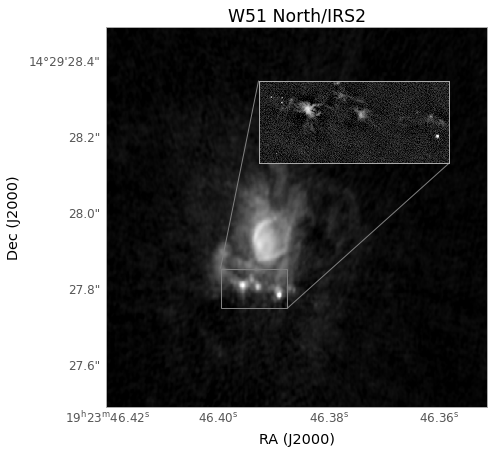

In [258]:
fig, ax = plt.subplots(figsize=[7, 7])

# make data
Z3 = zoomin
extent = (0, 20, 0, 20)
ax = plt.subplot(projection=wcs_IRS2.celestial)
ax.imshow(Z3, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower", norm=norm2)
ax.grid(False)

# inset axes....
axins = ax.inset_axes([0.4, 0.5, 0.5, 0.5])
axins.imshow(zoomin2, cmap='gray',interpolation="nearest",
          origin="lower", norm=norm3)
# sub region of the original image
x1, x2, y1, y2 = 0, 1000, 0, 400
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.grid(False)
bbox = Bbox(np.array([(6,5.2),(9.5, 7.3)]))
rect = TransformedBbox(bbox, ax.transData)

markinkwargs = dict(fc='none', ec='0.5')

pp = BboxPatch(rect, fill=False, **markinkwargs)
ax.add_patch(pp)
p1 = BboxConnector(axins.bbox, rect, loc1=2, **markinkwargs)
axins.add_patch(p1)
p1.set_clip_on(False)
p2 = BboxConnector(axins.bbox, rect, loc1=4, **markinkwargs)
axins.add_patch(p2)
p2.set_clip_on(False)
# ax = plt.subplot(projection=mywcs.celestial)
# ax.indicate_inset_zoom(axins)
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
ax.set_title('W51 North/IRS2')
plt.show()

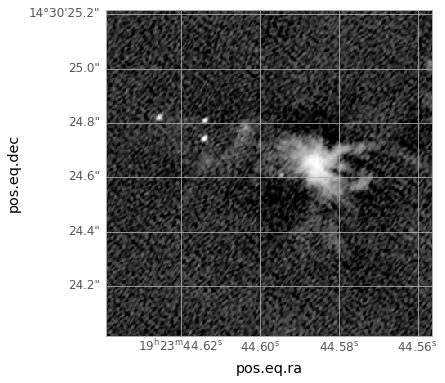

In [320]:
blob1 = image_data3[2350:2750, 2300:2700]
norm3=simple_norm(blob1, stretch='asinh', min_percent=5, max_percent=99.99)
fig = plt.figure()
ax = plt.subplot(projection=wcs3.celestial)
ax.imshow(blob1, cmap='gray', interpolation="nearest", origin="lower", norm=norm3)
plt.show()

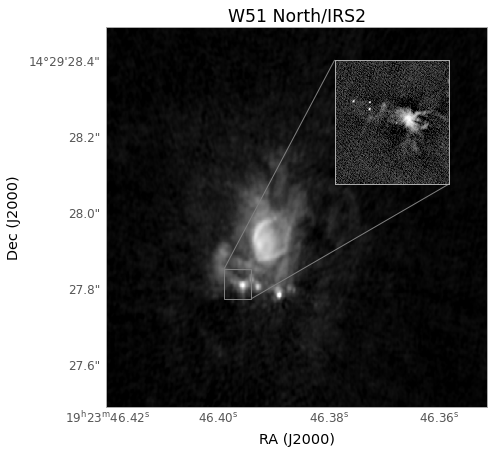

In [355]:
fig, ax = plt.subplots(figsize=[7, 7])

# make data
Z3 = zoomin
extent = (0, 20, 0, 20)
ax = plt.subplot(projection=wcs_IRS2.celestial)
ax.imshow(Z3, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower", norm=norm2)
ax.grid(False)

# inset axes....
axins = ax.inset_axes([0.6, 0.5, 0.3, 0.5])
axins.imshow(blob1, cmap='gray',interpolation="nearest",
          origin="lower", norm=norm3)
# sub region of the original image
x1, x2, y1, y2 = 0, 400, 0, 400
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.grid(False)
bbox = Bbox(np.array([(6.2,5.7),(7.6, 7.3)]))
rect = TransformedBbox(bbox, ax.transData)

markinkwargs = dict(fc='none', ec='0.5')

pp = BboxPatch(rect, fill=False, **markinkwargs)
ax.add_patch(pp)
p1 = BboxConnector(axins.bbox, rect, loc1=2, **markinkwargs)
axins.add_patch(p1)
p1.set_clip_on(False)
p2 = BboxConnector(axins.bbox, rect, loc1=4, **markinkwargs)
axins.add_patch(p2)
p2.set_clip_on(False)
# ax = plt.subplot(projection=mywcs.celestial)
# ax.indicate_inset_zoom(axins)
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
ax.set_title('W51 North/IRS2')
plt.show()

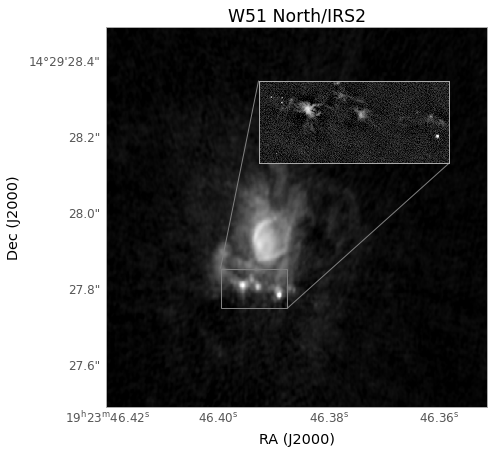

In [258]:
fig, ax = plt.subplots(figsize=[7, 7])

# make data
Z3 = zoomin
extent = (0, 20, 0, 20)
ax = plt.subplot(projection=wcs_IRS2.celestial)
ax.imshow(Z3, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower", norm=norm2)
ax.grid(False)

# inset axes....
axins = ax.inset_axes([0.4, 0.5, 0.5, 0.5])
axins.imshow(zoomin2, cmap='gray',interpolation="nearest",
          origin="lower", norm=norm3)
# sub region of the original image
x1, x2, y1, y2 = 0, 1000, 0, 400
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.grid(False)
bbox = Bbox(np.array([(6,5.2),(9.5, 7.3)]))
rect = TransformedBbox(bbox, ax.transData)

markinkwargs = dict(fc='none', ec='0.5')

pp = BboxPatch(rect, fill=False, **markinkwargs)
ax.add_patch(pp)
p1 = BboxConnector(axins.bbox, rect, loc1=2, **markinkwargs)
axins.add_patch(p1)
p1.set_clip_on(False)
p2 = BboxConnector(axins.bbox, rect, loc1=4, **markinkwargs)
axins.add_patch(p2)
p2.set_clip_on(False)
# ax = plt.subplot(projection=mywcs.celestial)
# ax.indicate_inset_zoom(axins)
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
ax.set_title('W51 North/IRS2')
plt.show()

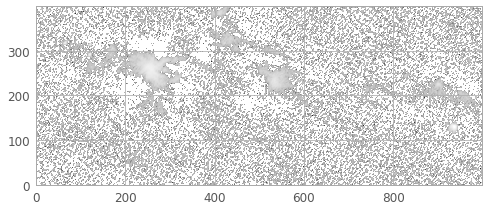

In [259]:
blob1 = image_data3[2300:2700, 2300:2500]
plt.imshow(zoomin2, cmap='gray', interpolation="nearest", origin="lower", norm=LogNorm())
plt.show()
# This honestly looks really cool, but I don't know what im doing

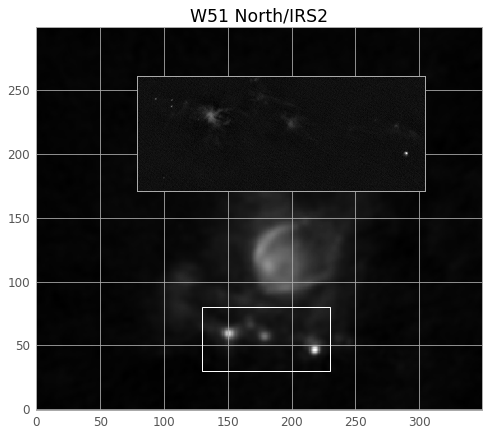

In [260]:

zoomin4 = image_data2[1900:2200, 1700:2050]
fig, ax = plt.subplots(figsize=[8, 8])
plt.imshow(zoomin4, cmap='gray', interpolation="nearest", origin="lower")
ax.add_patch(
    patches.Rectangle(xy=(130, 30),  # point of origin.
        width=100,
        height=50,
        linewidth=1,
        color='White',
        fill=False))
# ax.grid(False)
# plt.axis([0, 100, 0, 100])
plt.title('W51 North/IRS2')
plt.axes([.3, .55, .5, .2])
plt.imshow(zoomin2, cmap='gray', interpolation="nearest", origin="lower")
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.grid(False)
plt.show()

In [261]:
image_file4 ='/orange/adamginsburg/w51/2017.1.00293.S/FITS/w51e2_sci.spw0_4_8_12_16.cube.I.manual.image.pbcor.max.fits'

In [262]:
hdu_list4 = fits.open(image_file4)
hdu_list4.info()

Filename: /orange/adamginsburg/w51/2017.1.00293.S/FITS/w51e2_sci.spw0_4_8_12_16.cube.I.manual.image.pbcor.max.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (14700, 14700)   float32   


In [263]:
image_data4 = hdu_list4[0].data

In [264]:
print(type(image_data4))
print(image_data4.shape)

<class 'numpy.ndarray'>
(14700, 14700)


In [265]:
image_data4 = np.squeeze(image_data4)

In [266]:
hdu_list4.close()

In [267]:
norm4=simple_norm(zoomin2, stretch='asinh', min_percent=5, max_percent=99.999)

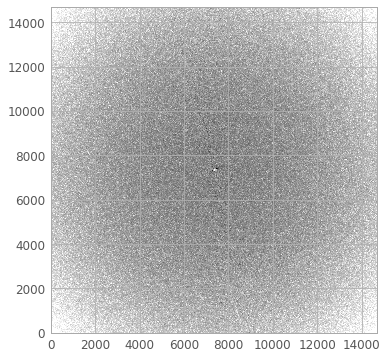

In [268]:
plt.imshow(image_data4, cmap='gray', interpolation="nearest", origin="lower", norm=norm4)
plt.show()

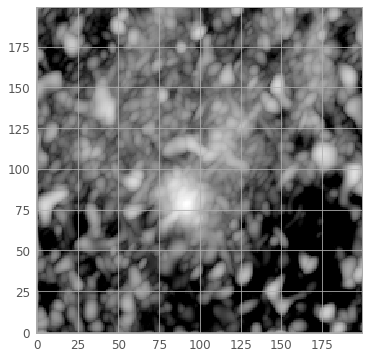

In [269]:
zoomin6 = image_data4[7250:7450, 7100:7300] #[7250:7450, 7300:7600]
norm5=simple_norm(zoomin6, stretch='asinh', min_percent=10, max_percent=99.999)
plt.imshow(zoomin6, cmap='gray', interpolation="nearest", origin="lower", norm=norm5)
plt.show()

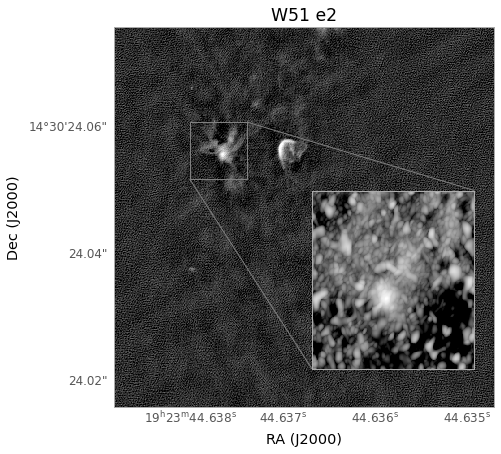

In [272]:
fig, ax = plt.subplots(figsize=[7, 7])

# make data
Z2 = cropped
extent = (0, 20, 0, 20)
ax = plt.subplot(projection=wcs_e2.celestial)
ax.imshow(Z2, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower", norm=norm0)
ax.grid(False)
# inset axes....
axins = ax.inset_axes([0.5, 0.1, 0.47, 0.47])
axins.imshow(zoomin6, cmap='gray', interpolation="nearest", origin="lower", norm=norm5)
# sub region of the original image
x1, x2, y1, y2 = 0, 200, 0, 200
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.grid(False)
bbox = Bbox(np.array([(4,12),(7, 15)]))
rect = TransformedBbox(bbox, ax.transData)

markinkwargs = dict(fc='none', ec='0.5')

pp = BboxPatch(rect, fill=False, **markinkwargs)
ax.add_patch(pp)
p1 = BboxConnector(axins.bbox, rect, loc1=1, **markinkwargs)
axins.add_patch(p1)
p1.set_clip_on(False)
p2 = BboxConnector(axins.bbox, rect, loc1=3, **markinkwargs)
axins.add_patch(p2)
p2.set_clip_on(False)
# ax = plt.subplot(projection=mywcs.celestial)
# ax.indicate_inset_zoom(axins)
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
ax.set_title('W51 e2')
plt.show()

plt.show()

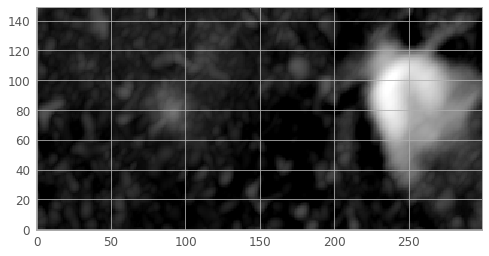

In [285]:
zoomin7 = image_data4[7250:7400, 7100:7400] #[7250:7450, 7300:7600]
norm5=simple_norm(zoomin7, stretch='asinh', min_percent=10, max_percent=99.9)
plt.imshow(zoomin7, cmap='gray', interpolation="nearest", origin="lower", norm=norm5)
plt.show()

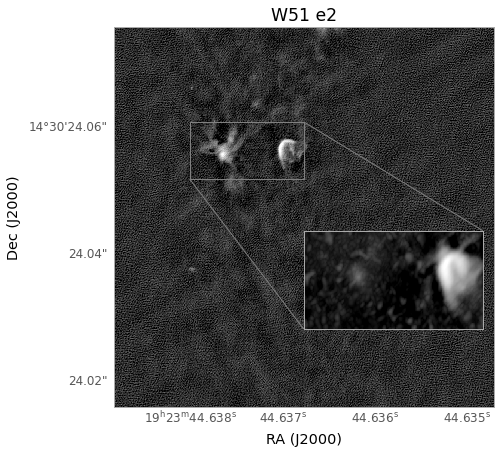

In [290]:
fig, ax = plt.subplots(figsize=[7, 7])

# make data
Z2 = cropped
extent = (0, 20, 0, 20)
ax = plt.subplot(projection=wcs_e2.celestial)
ax.imshow(Z2, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower", norm=norm0)
ax.grid(False)
# inset axes....
axins = ax.inset_axes([0.5, 0.1, 0.47, 0.47])
axins.imshow(zoomin7, cmap='gray', interpolation="nearest", origin="lower", norm=norm5)
# sub region of the original image
x1, x2, y1, y2 = 0, 300, 0, 150
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.grid(False)
bbox = Bbox(np.array([(4,12),(10, 15)]))
rect = TransformedBbox(bbox, ax.transData)

markinkwargs = dict(fc='none', ec='0.5')

pp = BboxPatch(rect, fill=False, **markinkwargs)
ax.add_patch(pp)
p1 = BboxConnector(axins.bbox, rect, loc1=1, **markinkwargs)
axins.add_patch(p1)
p1.set_clip_on(False)
p2 = BboxConnector(axins.bbox, rect, loc1=3, **markinkwargs)
axins.add_patch(p2)
p2.set_clip_on(False)
# ax = plt.subplot(projection=mywcs.celestial)
# ax.indicate_inset_zoom(axins)
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
ax.set_title('W51 e2')
plt.show()

plt.show()

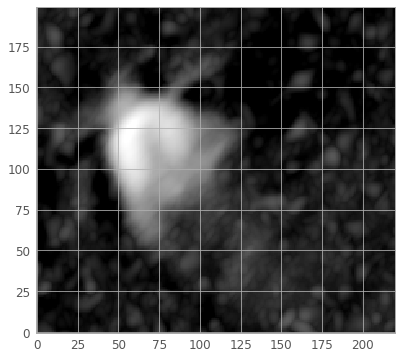

In [311]:
zoomin8 = image_data4[7225:7425, 7280:7500] #[7250:7450, 7300:7600]
norm5=simple_norm(zoomin8, stretch='asinh', min_percent=10, max_percent=99.9)
plt.imshow(zoomin8, cmap='gray', interpolation="nearest", origin="lower", norm=norm5)
plt.show()

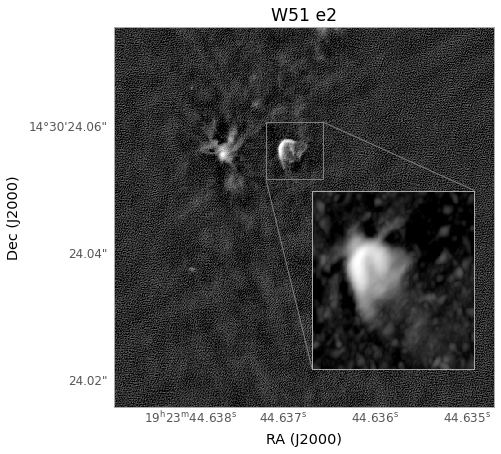

In [313]:
fig, ax = plt.subplots(figsize=[7, 7])

# make data
Z2 = cropped
extent = (0, 20, 0, 20)
ax = plt.subplot(projection=wcs_e2.celestial)
ax.imshow(Z2, cmap='gray', extent=extent, interpolation="nearest",
          origin="lower", norm=norm0)
ax.grid(False)
# inset axes....
axins = ax.inset_axes([0.5, 0.1, 0.47, 0.47])
axins.imshow(zoomin8, cmap='gray', interpolation="nearest", origin="lower", norm=norm5)
# sub region of the original image
x1, x2, y1, y2 = 0, 200, 0, 200
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.grid(False)
bbox = Bbox(np.array([(8,12),(11, 15)]))
rect = TransformedBbox(bbox, ax.transData)

markinkwargs = dict(fc='none', ec='0.5')

pp = BboxPatch(rect, fill=False, **markinkwargs)
ax.add_patch(pp)
p1 = BboxConnector(axins.bbox, rect, loc1=1, **markinkwargs)
axins.add_patch(p1)
p1.set_clip_on(False)
p2 = BboxConnector(axins.bbox, rect, loc1=3, **markinkwargs)
axins.add_patch(p2)
p2.set_clip_on(False)
# ax = plt.subplot(projection=mywcs.celestial)
# ax.indicate_inset_zoom(axins)
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
ax.set_title('W51 e2')
plt.show()

plt.show()

In [271]:
# zoomin6 = image_data4[3200:4000, 3000:3800]
# zoomin5 = image_data[3200:4000, 3000:3800]
# fig, ax = plt.subplots(figsize=[8, 8])
# plt.imshow(zoomin5, cmap='gray', interpolation="nearest", origin="lower")
# ax.add_patch(
#     patches.Rectangle(xy=(210, 250),  # point of origin.
#         width=100,
#         height=100,
#         linewidth=1,
#         color='White',
#         fill=False))
# # ax.grid(False)
# # plt.axis([0, 100, 0, 100])
# plt.title('W51 E2')
# plt.axes([.3, .55, .5, .2])
# plt.imshow(zoomin6, cmap='gray', interpolation="nearest", origin="lower")
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# plt.grid(False)
# plt.show()